In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
try:
    df = pd.read_csv("./Fraud_web_data.csv")

    print("Dataset loaded successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    print("\nShape of the dataset (rows, columns):")
    print(df.shape)

    print("\nInformation about the dataset (data types, non-null counts):")
    df.info()

    print("\nDistribution of the target variable (status):")
    print(df['status'].value_counts())
except FileNotFoundError:
    print("Error: '/kaggle/input/web-page-phishing-detection-dataset/dataset_phishing.csv' not found.")
    print("Please make sure the CSV file is in the same directory as this script, or provide the full path.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!

First 5 rows of the dataset:
                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  wh

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = df.drop("url", axis=1)
print("'url' column dropped")

label_encoder = LabelEncoder()
df["status_encoding"] = label_encoder.fit_transform(df["status"])
status_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Status column encoded. Mapping {status_mapping}")

df = df.drop("status", axis=1)
print("Original 'status' column dropped.")

print("\nHandling -1 values in 'domain_age' and 'domain_registration_length'...")

median_domain_age = df[df['domain_age'] != -1]['domain_age'].median()
median_domain_registration_length = df[df['domain_registration_length'] != -1]['domain_registration_length'].median()

df['domain_age'] = df['domain_age'].replace(-1, median_domain_age)
df['domain_registration_length'] = df['domain_registration_length'].replace(-1, median_domain_registration_length)

print(f"Replaced -1 in 'domain_age' with median: {median_domain_age}")
print(f"Replaced -1 in 'domain_registration_length' with median: {median_domain_registration_length}")

X = df.drop('status_encoding', axis=1)
y = df['status_encoding']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set features (X_train) shape: {X_train.shape}")
print(f"Testing set features (X_test) shape: {X_test.shape}")
print(f"Training set target (y_train) shape: {y_train.shape}")
print(f"Testing set target (y_test) shape: {y_test.shape}")

print("\nPreprocessing complete. Data is ready for model training.")

'url' column dropped
Status column encoded. Mapping {'legitimate': 0, 'phishing': 1}
Original 'status' column dropped.

Handling -1 values in 'domain_age' and 'domain_registration_length'...
Replaced -1 in 'domain_age' with median: 5056.0
Replaced -1 in 'domain_registration_length' with median: 245.0

Features (X) shape: (11430, 87)
Target (y) shape: (11430,)

Training set features (X_train) shape: (9144, 87)
Testing set features (X_test) shape: (2286, 87)
Training set target (y_train) shape: (9144,)
Testing set target (y_test) shape: (2286,)

Preprocessing complete. Data is ready for model training.


In [4]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# Instantiate the model
NB = GaussianNB()

# Fit the model 
NB.fit(X_train,y_train)

GaussianNB()

In [5]:
#predicting the target value from the model for the samples
y_train_nb = NB.predict(X_train)
y_test_nb = NB.predict(X_test)

In [6]:

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.755
Naive Bayes Classifier : Accuracy on test Data: 0.754

Naive Bayes Classifier : f1_score on training Data: 0.783
Naive Bayes Classifier : f1_score on test Data: 0.782

Naive Bayes Classifier : Recall on training Data: 0.885
Naive Bayes Classifier : Recall on test Data: 0.884

Naive Bayes Classifier : precision on training Data: 0.702
Naive Bayes Classifier : precision on test Data: 0.701


In [7]:
%pip install catboost
from catboost import CatBoostClassifier

# Instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# Fit the model 
cat.fit(X_train,y_train)


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
0:	learn: 0.5530411	total: 174ms	remaining: 2m 53s
1:	learn: 0.4612576	total: 186ms	remaining: 1m 32s
2:	learn: 0.3960239	total: 197ms	remaining: 1m 5s
3:	learn: 0.3423691	total: 204ms	remaining: 50.8s
4:	learn: 0.3085174	total: 211ms	remaining: 42s
5:	learn: 0.2762054	total: 217ms	remaining: 35.9s
6:	learn: 0.2485114	total: 222ms	remaining: 31.5s
7:	learn: 0.2306295	total: 226ms	remaining: 28.1s
8:	learn: 0.2129674	total: 231ms	remaining: 25.4s
9:	learn: 0.2004333	total: 236ms	remaining: 23.3s
10:	learn: 0.1930295	total: 240ms	remaining: 21.6s
11:	learn: 0.1864446	total: 245ms	remaining: 20.1s
12:	learn: 0.1815580	total: 249ms	remaining: 18.9s
13:	learn: 0.1750870	total: 253ms	remaining: 17.8s
14:	learn: 0.1701315	total: 257ms	remaining: 16.9s
15:	learn: 0.1663329	total: 262ms	remaining: 16.1s
16:	learn: 0.1621004	total: 266ms	remaining: 15.4s
17:	learn: 0.1583920	total: 271ms	remaining: 14.8s
18:	learn: 0.1542542	total

In [8]:


import matplotlib.pyplot as plt

y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

In [9]:
print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1143
           1       0.96      0.97      0.97      1143

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [10]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    cat_test =  CatBoostClassifier(learning_rate = n*0.1)

    cat_test.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(cat_test.score(X_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(cat_test.score(X_test, y_test))

0:	learn: 0.5530411	total: 6.28ms	remaining: 6.27s
1:	learn: 0.4612576	total: 11.5ms	remaining: 5.76s
2:	learn: 0.3960239	total: 17.3ms	remaining: 5.74s
3:	learn: 0.3423691	total: 23.1ms	remaining: 5.76s
4:	learn: 0.3085174	total: 28ms	remaining: 5.58s
5:	learn: 0.2762054	total: 34.3ms	remaining: 5.69s
6:	learn: 0.2485114	total: 40.7ms	remaining: 5.78s
7:	learn: 0.2306295	total: 46ms	remaining: 5.71s
8:	learn: 0.2129674	total: 52.6ms	remaining: 5.79s
9:	learn: 0.2004333	total: 58.6ms	remaining: 5.8s
10:	learn: 0.1930295	total: 64.3ms	remaining: 5.79s
11:	learn: 0.1864446	total: 71.1ms	remaining: 5.85s
12:	learn: 0.1815580	total: 76.7ms	remaining: 5.82s
13:	learn: 0.1750870	total: 83.4ms	remaining: 5.87s
14:	learn: 0.1701315	total: 88.7ms	remaining: 5.83s
15:	learn: 0.1663329	total: 94.4ms	remaining: 5.8s
16:	learn: 0.1621004	total: 100ms	remaining: 5.79s
17:	learn: 0.1583920	total: 106ms	remaining: 5.79s
18:	learn: 0.1542542	total: 113ms	remaining: 5.81s
19:	learn: 0.1503781	total: 119

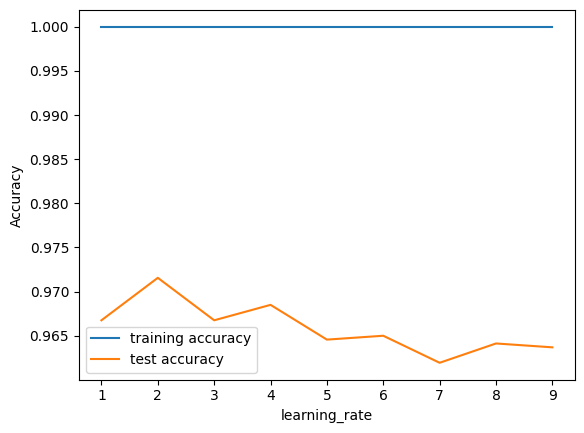

In [11]:
# Plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("\n--- RandomForestClassifier Model Training ---")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)

print("Training Random Forest Classifier...")
model.fit(X_train, y_train)
print("Model training complete...")

print("Evaluating Model...")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\n--- Confusion Matrix Breakdown ---")
TN, FP, FN, TP = conf_matrix.ravel()
print(f"True Negatives (Legitimate Correctly Classified): {TN}")
print(f"False Positives (Legitimate Classified as Phishing): {FP}")
print(f"False Negatives (Phishing Classified as Legitimate): {FN}")
print(f"True Positives (Phishing Correctly Classified): {TP}")


--- RandomForestClassifier Model Training ---
Training Random Forest Classifier...
Model training complete...
Evaluating Model...
Accuracy: 0.9619
Precision: 0.9607
Recall: 0.9633
F1-Score: 0.9620

Confusion Matrix:
[[1098   45]
 [  42 1101]]

--- Confusion Matrix Breakdown ---
True Negatives (Legitimate Correctly Classified): 1098
False Positives (Legitimate Classified as Phishing): 45
False Negatives (Phishing Classified as Legitimate): 42
True Positives (Phishing Correctly Classified): 1101


In [13]:
from sklearn.model_selection import GridSearchCV

print("Starting Hyperparameter Tuning with GridSearchCV...")

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": ["sqrt", "log2"],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=1,
    verbose=2)

print("Running GridSearchCV, this might take some time...")
grid_search.fit(X_train, y_train)
print("GridSearchCV complete.")

print("\n--- Best Parameters and Score from GridSearchCV ---")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best F1-Score found on training data (cross-validated): {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-Score: {f1_best:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_best)

print("\n--- Confusion Matrix Breakdown ---")
TN, FP, FN, TP = conf_matrix_best.ravel()
print(f"True Negatives (Legitimate Correctly Classified): {TN}")
print(f"False Positives (Legitimate Classified as Phishing): {FP}")
print(f"False Negatives (Phishing Classified as Legitimate): {FN}")
print(f"True Positives (Phishing Correctly Classified): {TP}")

print("\n--- Hyperparameter Tuning Complete ---")

Starting Hyperparameter Tuning with GridSearchCV...
Running GridSearchCV, this might take some time...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 

\n--- Feature Importances from Random Forest ---
google_index: 0.1421
page_rank: 0.0933
nb_hyperlinks: 0.0731
web_traffic: 0.0700
domain_age: 0.0419
nb_www: 0.0361
ratio_extHyperlinks: 0.0338
ratio_intHyperlinks: 0.0303
phish_hints: 0.0271
safe_anchor: 0.0252
longest_word_path: 0.0239
ratio_extRedirection: 0.0206
length_url: 0.0193
length_hostname: 0.0192
ratio_digits_url: 0.0186
longest_words_raw: 0.0169
length_words_raw: 0.0169
shortest_word_host: 0.0160
char_repeat: 0.0157
avg_word_path: 0.0155


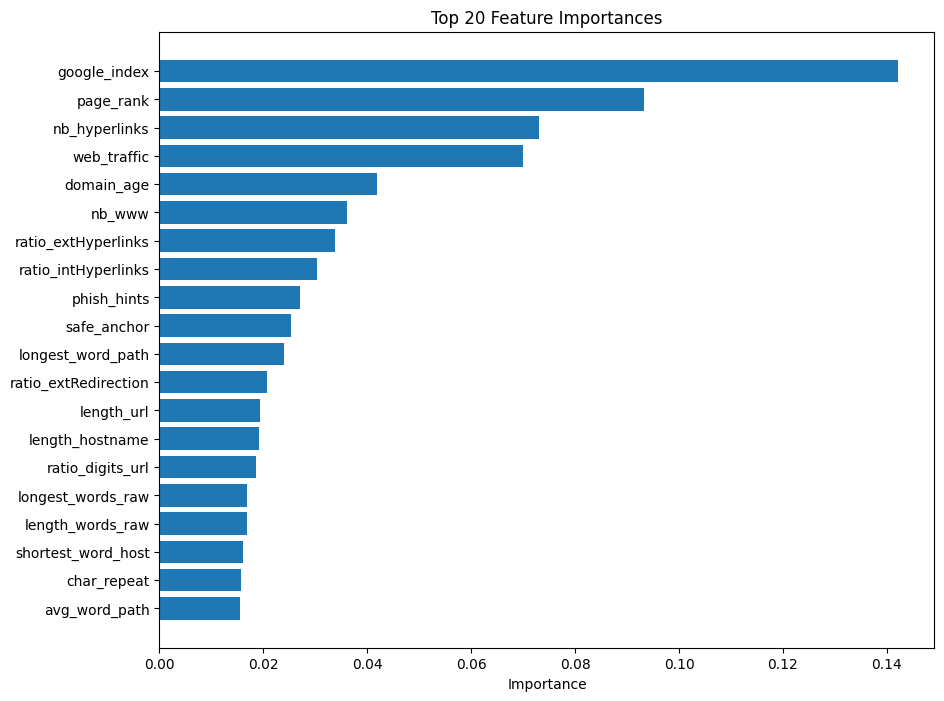

\n--- SHAP Explainability ---


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [14]:
import matplotlib.pyplot as plt
import shap
import joblib

# --- FEATURE IMPORTANCE (Global Explainability) ---
print("\\n--- Feature Importances from Random Forest ---")
importances = best_model.feature_importances_
feature_names = X_train.columns

# Sort and display top 20 features
sorted_idx = importances.argsort()[::-1]
for i in sorted_idx[:20]: # Display top 20 for brevity
    print(f"{feature_names[i]}: {importances[i]:.4f}")

# Plot top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh([feature_names[i] for i in sorted_idx[:20]], importances[sorted_idx][:20])
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis() # Display most important at the top
plt.show()


# --- SHAP EXPLAINABILITY ---
print("\\n--- SHAP Explainability ---")

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Global summary plot
shap.summary_plot(shap_values[1], X_test, feature_names=feature_names, max_display=20)


# --- Local Explanation for a Single Prediction (FIXED) ---
sample_index = 0
print(f"\\nExplaining prediction for sample index {sample_index}")

# The force_plot expects the base value, the shap values for the instance, and the feature values for the instance
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][sample_index],
    X_test.iloc[sample_index],
    matplotlib=True
)


# --- SAVING THE MODEL (Filename corrected) ---
print("\\n--- Saving the Best Trained Model ---")
model_filename = 'model.joblib'
joblib.dump(best_model, model_filename)

print(f"Your optimized model was saved successfully as '{model_filename}'")
print("--- Model Saving Complete ---")

In [ ]:
import joblib

print("--- Saving the Best Trained scikit-learn Model for Future Python Use ---")

scikit_learn_model_filename = 'model_sklearn.joblib'

joblib.dump(best_model, scikit_learn_model_filename)

print(f"Your optimized scikit-learn model saved successfully as '{scikit_learn_model_filename}'")
print("This model can be easily loaded back into a Python environment for other applications.")

print("\n--- scikit-learn Model Saving Complete ---")

--- Saving the Best Trained scikit-learn Model for Future Python Use ---
Your optimized scikit-learn model saved successfully as 'Fraud_WEB_detection_random_forest_model_sklearn.joblib'
This model can be easily loaded back into a Python environment for other applications.

--- scikit-learn Model Saving Complete ---


In [ ]:
https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset/data

SyntaxError: invalid syntax (656806748.py, line 1)